# project title- clustering of the customers based on their annual income and spending

**NOTE**- **this is a machine learning(k-means clustering) project based on their annual income and spending.**

*project done by- Krishna Kumar*

In [88]:
# import libraries to read/manipulate the data and for clustering as well
# here we use KMeans clustering and we shall standarized the data
# import the library to calculate silhouette score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [90]:
# read the data from working directory 
data= pd.read_csv("C:/Users/lenovo/Desktop/myproject/new data/dataset.csv")

In [91]:
# first few rows of the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [92]:
# check how many rows and columns in the data
data.shape

(200, 5)

In [93]:
# info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [94]:
# check if there is any null value presents in the data
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [95]:
# describe the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


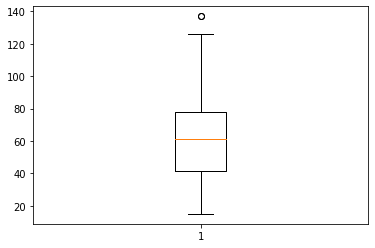

In [96]:
# boxplot for annual income
plt.boxplot(data["Annual Income (k$)"])
plt.show()

In [97]:
# there are outliers in thee data so check the maximum value in the data
data.max()

CustomerID                 200
Gender                    Male
Age                         70
Annual Income (k$)         137
Spending Score (1-100)      99
dtype: object

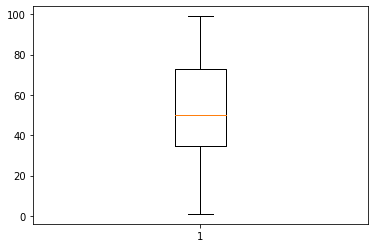

In [98]:
# boxplot of total spending by customers
plt.boxplot(data["Spending Score (1-100)"])
plt.show()

In [11]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [99]:
# drop unneccessary columns in the data
new_data_1= data.drop(["Age", "Gender"],1,)

In [58]:
new_data_1.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [61]:
new_data_2= new_data_1.drop(["CustomerID"], 1)
new_data_2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [100]:
# standardization of the data
scaler= StandardScaler()
new_data_scaled= scaler.fit_transform(new_data_2)

In [63]:
new_data_scaled.shape

(200, 2)

In [101]:
# because the data is a numpy array. so convert the data into data frame
new_data_scaled = pd.DataFrame(new_data_scaled)

In [102]:
new_data_scaled.columns= ["income", "speding"]
new_data_scaled.head()

,income,speding
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [103]:
# applying kmeans clustering
kmeans= KMeans(n_clusters= 5, max_iter= 50)
kmeans.fit(new_data_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [104]:
kmeans.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [105]:
# elbow curve/ssd to check how many clusters we need to take
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(new_data_scaled)
    
    ssd.append(kmeans.inertia_)

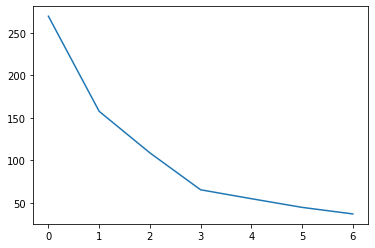

In [76]:
plt.plot(ssd)

In [77]:
# silhouette score for cluster selection
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(new_data_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(new_data_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.29512063001659344
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5394911417553498
For n_clusters=7, the silhouette score is 0.5281492781108291
For n_clusters=8, the silhouette score is 0.455714100829245


In [106]:
# here we choose 4 clusters
kmeans= KMeans(n_clusters= 4, max_iter= 50)
kmeans.fit(new_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [109]:
#labels of clusters
kmeans.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [110]:
# new data frame for clusters with customer ID
new_data["cluster ID"]= kmeans.labels_
new_data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),cluster ID
0,1,15,39,3
1,2,15,81,0
2,3,16,6,3
3,4,16,77,0
4,5,17,40,3


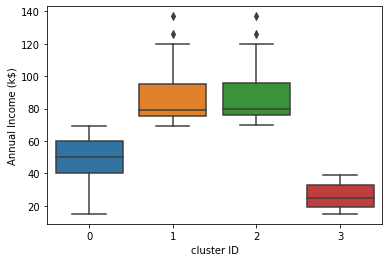

In [112]:
# these are the boxplots of clusters for annual income
sns.boxplot(x= "cluster ID", y="Annual Income (k$)", data = new_data)

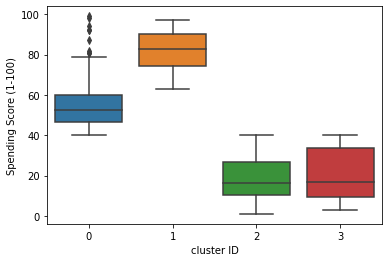

In [113]:
## these are the boxplots of clusters for spendings
sns.boxplot(x= "cluster ID", y="Spending Score (1-100)", data = new_data)

# Finished

**THANKS**